# CDC_Capstone:  Part I - Getting to Know the Data



Purpose: This is a linear regression problem used to determine the probability of diabetes based select features

In [1]:
#pip install import-ipynb

In [2]:
#pip install scipy

In [1]:

#### Run imports:
# standard data science imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Statistics imports
from scipy import stats
#import statsmodels.api as sm

import csv
import import_ipynb
import pandas as pd
#see more columns in my dataframe
pd.set_option('display.max_columns',100)

 



## Reading in the data into a pandas DataFrame

In [2]:
#save functions and data source
%run my_functions.ipynb

In [3]:
#read data
df = download_data(1)

In [4]:
df.head()

ID  Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0   0                0       1         1          1   40       1       0   
1   1                0       0         0          0   25       1       0   
2   2                0       1         1          1   28       0       0   
3   3                0       1         0          1   27       0       0   
4   4                0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                     0             0       0        1                  0   
1                     0             1       0        0                  0   
2                     0             0       1        0                  0   
3                     0             1       1        1                  0   
4                     0             1       1        1                  0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0              1            0        5        18        15         1    0   
1              0            1        3         0         0         0    0   
2              1            1        5        30        30         1    0   
3              1            0        2         0         0         0    0   
4              1            0        2         3         0         0    0   

   Age  Education  Income  
0    9          4       3  
1    7          6       1  
2    9          4       8  
3   11          3       6  
4   11          5       4

# Explore the Data



Use this space to familiarize myself with the data set.



Do some quick EDA
Check data types
Check amount of data  
Look at summary statistics
Review the column names

In [5]:
df.columns


Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

Imports


In [6]:
#display number of rows and columns
df.shape 


(253680, 23)

In [7]:
#display info
df.describe

<bound method NDFrame.describe of             ID  Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  \
0            0                0       1         1          1   40       1   
1            1                0       0         0          0   25       1   
2            2                0       1         1          1   28       0   
3            3                0       1         0          1   27       0   
4            4                0       1         1          1   24       0   
...        ...              ...     ...       ...        ...  ...     ...   
253675  253675                0       1         1          1   45       0   
253676  253676                1       1         1          1   18       0   
253677  253677                0       0         0          1   28       0   
253678  253678                0       1         0          1   23       0   
253679  253679                1       1         1          1   25       0   

        Stroke  HeartDiseaseorAttack  Phy

In [8]:
df.dtypes

ID                      int64
Diabetes_binary         int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [9]:
#discovering more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   ID                    253680 non-null  int64
 1   Diabetes_binary       253680 non-null  int64
 2   HighBP                253680 non-null  int64
 3   HighChol              253680 non-null  int64
 4   CholCheck             253680 non-null  int64
 5   BMI                   253680 non-null  int64
 6   Smoker                253680 non-null  int64
 7   Stroke                253680 non-null  int64
 8   HeartDiseaseorAttack  253680 non-null  int64
 9   PhysActivity          253680 non-null  int64
 10  Fruits                253680 non-null  int64
 11  Veggies               253680 non-null  int64
 12  HvyAlcoholConsump     253680 non-null  int64
 13  AnyHealthcare         253680 non-null  int64
 14  NoDocbcCost           253680 non-null  int64
 15  GenHlth               253680 non-n

In [10]:
#identify missing values -- the data has no missing values
df.isna().sum()

ID                      0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Dataset has no missing values

# Correlation 

## Identify most prominent features

<Axes: >

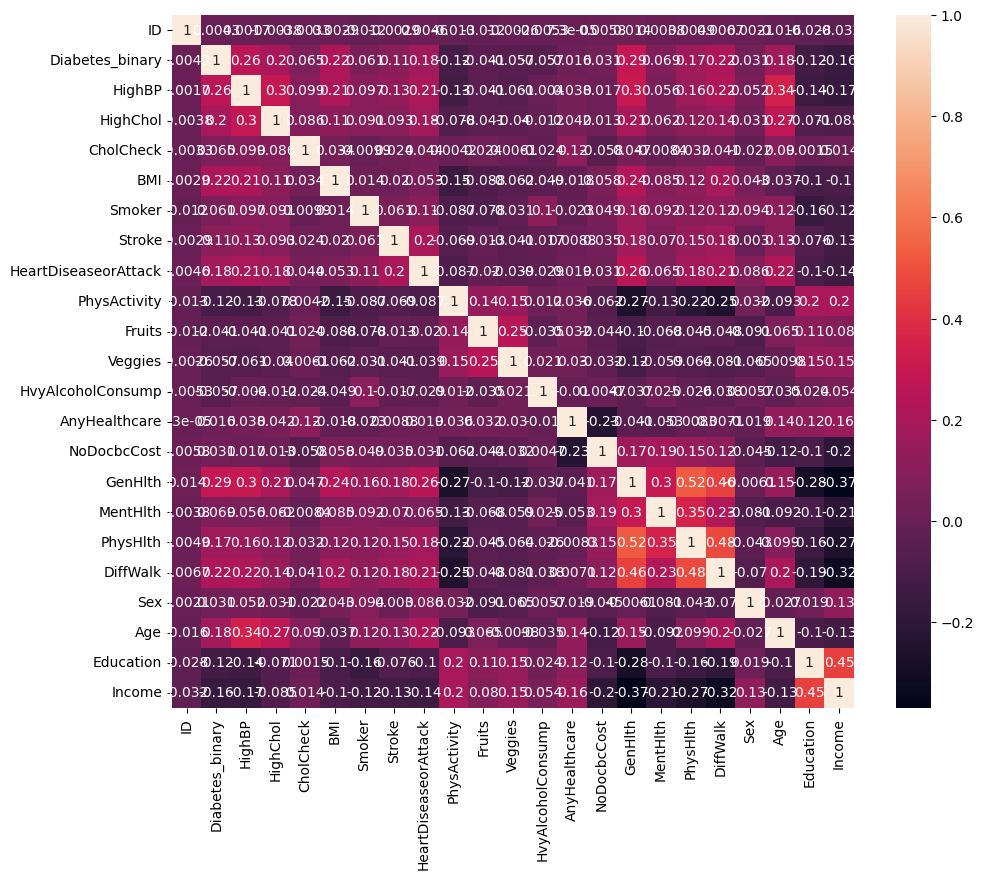

In [11]:

corr = df.corr()
# Heatmap for data correaltion
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(corr, annot=True)
#sns.heatmap(corr)

Education average in the data is college 1-3 years experience

identified heat around diffwalk, physical health, general health income and eduction.

<Axes: >

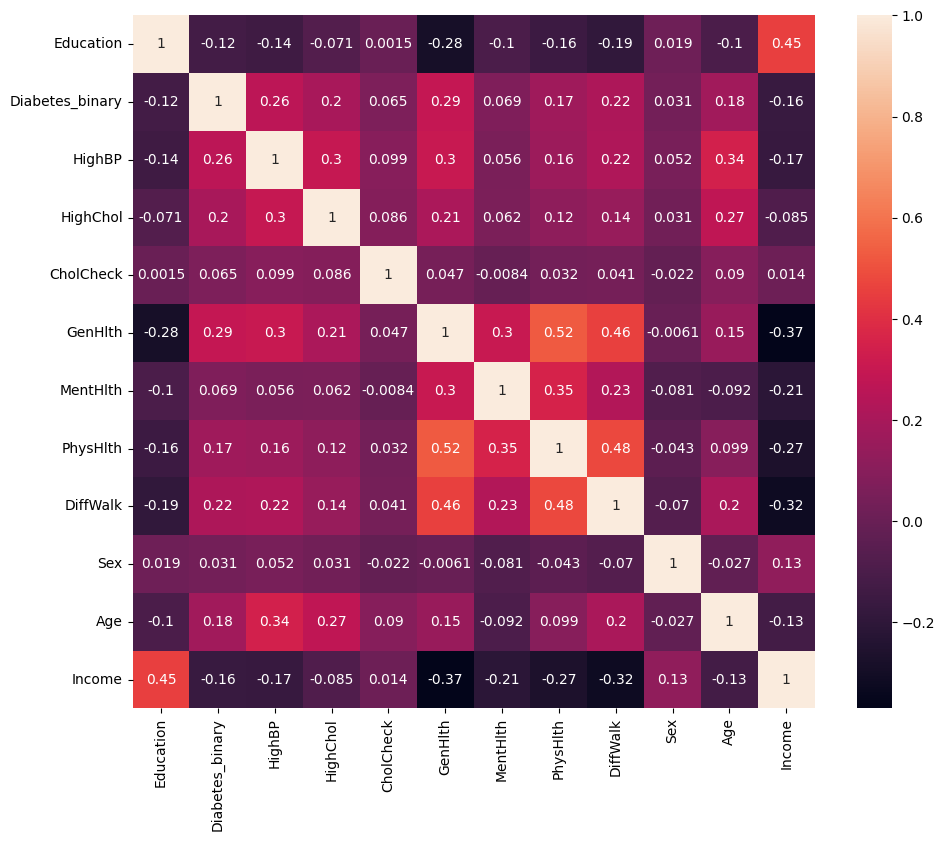

In [12]:
#Take a closer look
corr = df[['Education','Diabetes_binary','HighBP','HighChol','CholCheck','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Income']].corr()
# Heatmap for data correaltion
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(corr, annot=True)
#sns.heatmap(corr)

Top 5 correlated features are centered around mental and phyical health.  I plan to use this features when I build my prediction model
 

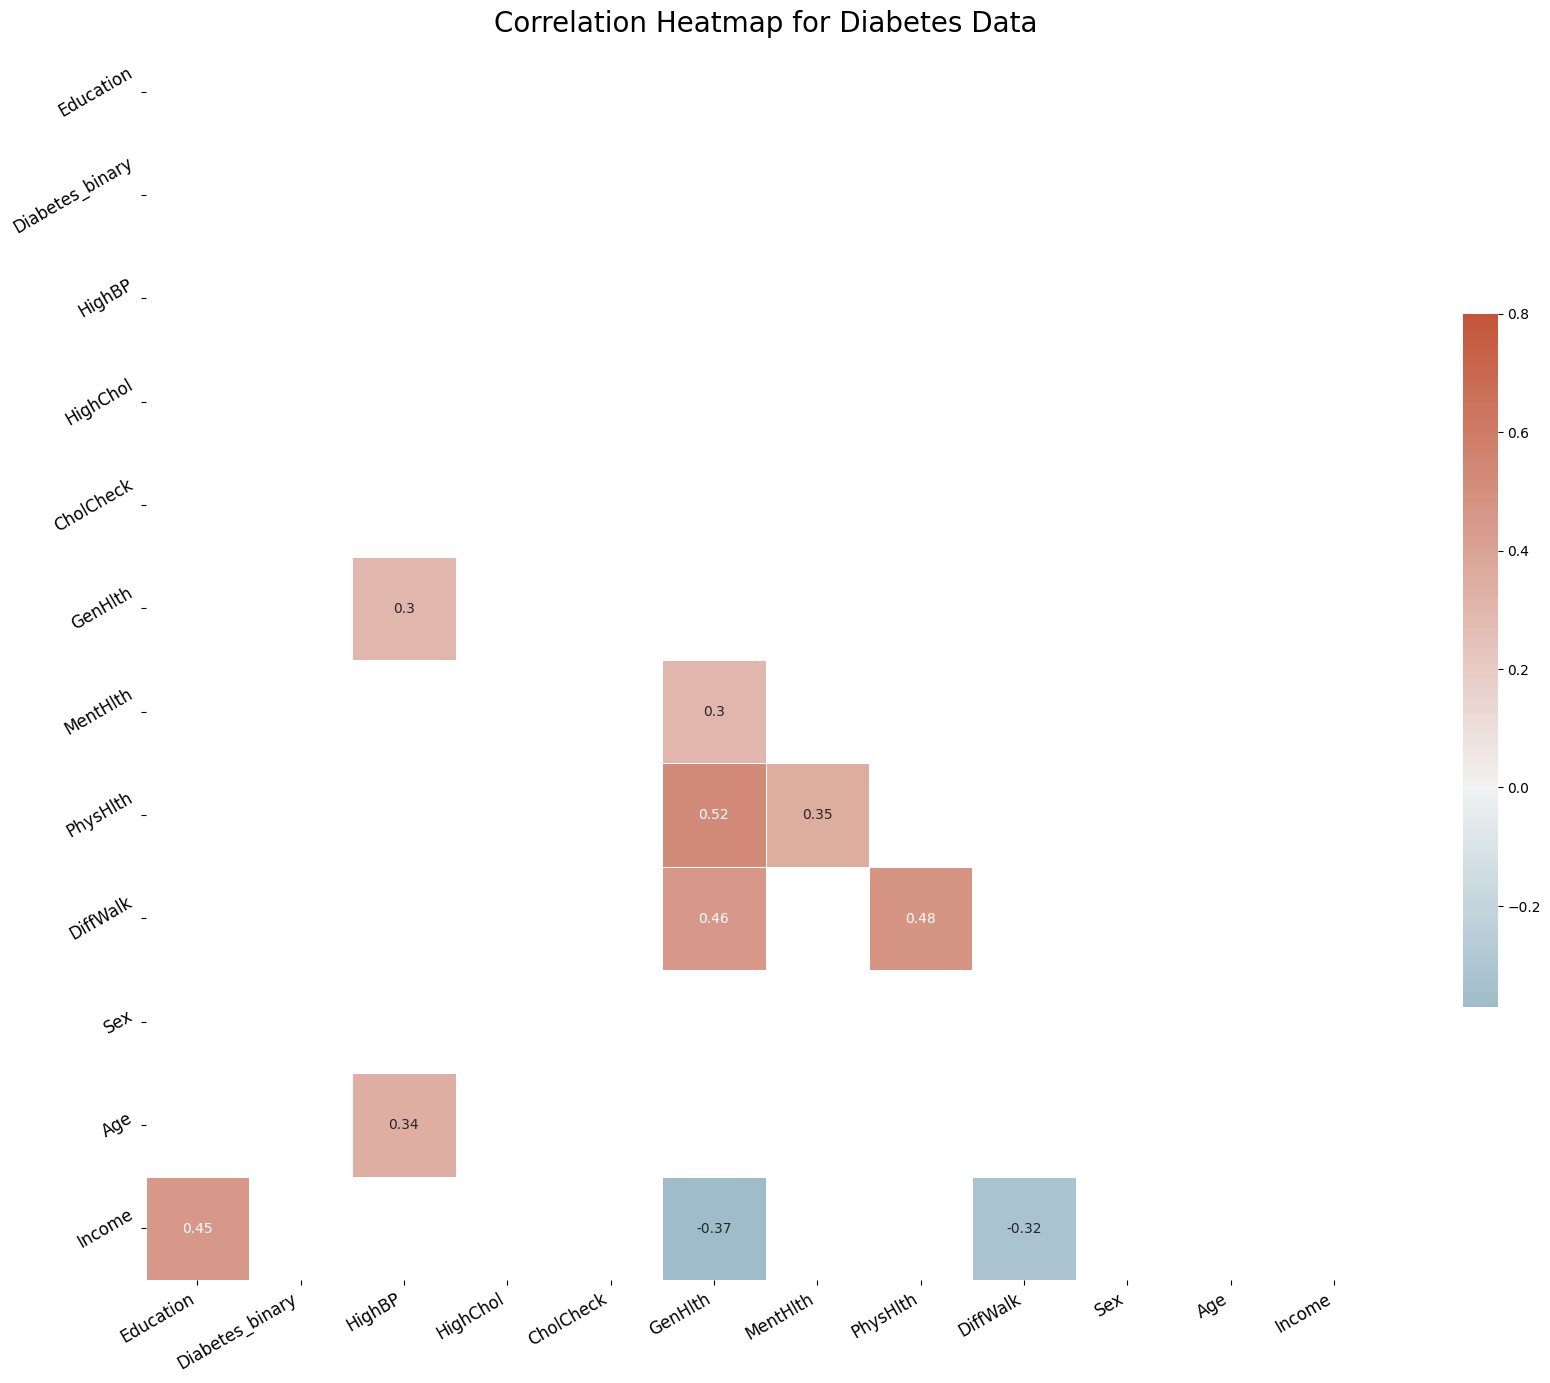

In [13]:

#only show correlations where the values are greater than .3

#Let's create a heatmap only with significant corrrelations that is a bit easier to read.

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
mask = mask|((np.abs(corr)<0.3).values)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
hm = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

hm.set_title('Correlation Heatmap for Diabetes Data', fontsize=20)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=30, ha='right')

plt.show();

### Check for outliers:

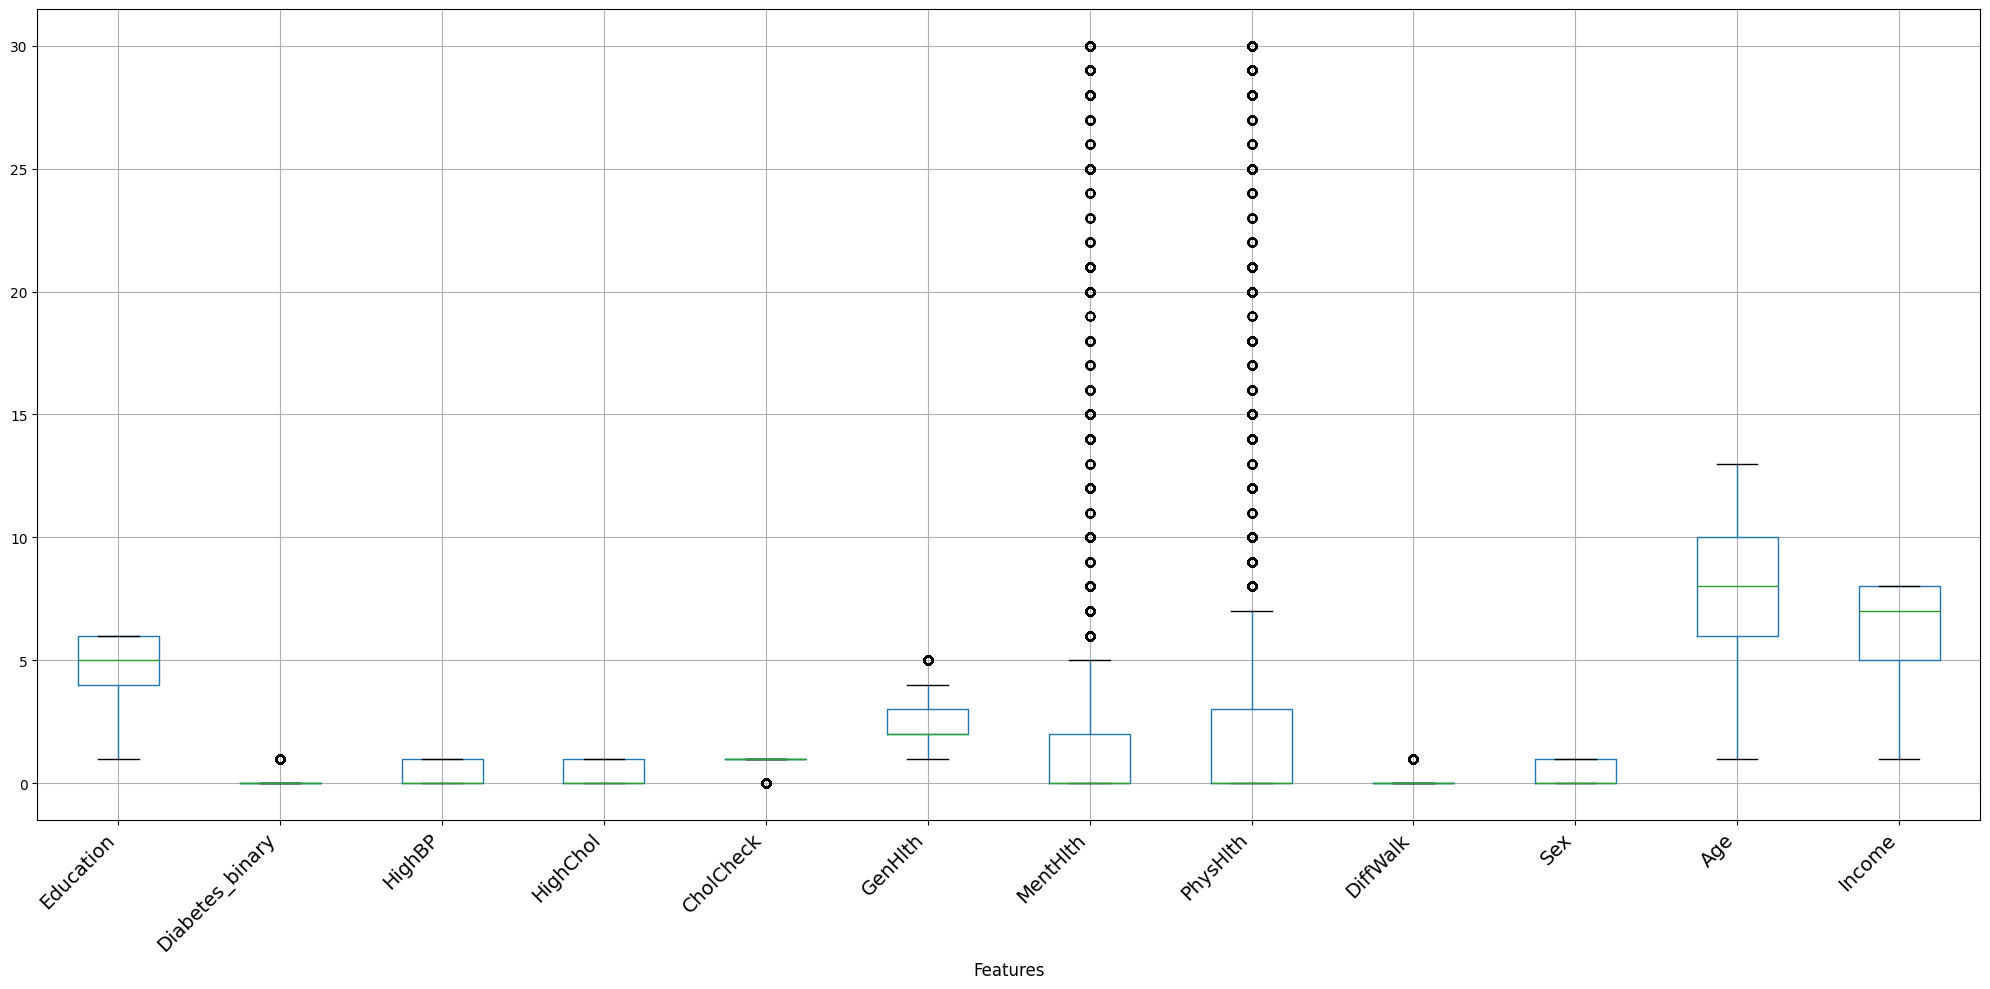

In [14]:
#df[['Education','Diabetes_binary','HighBP','HighChol','CholCheck','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Income']].boxplot()
# Create the boxplot
plt.figure(figsize=(20, 10))  # Adjust figure size for better readability
df[['Education','Diabetes_binary','HighBP','HighChol','CholCheck','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Income']].boxplot()

# Rotate x-axis labels for better readability with long labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and right-align them

# Increase font size of x-axis labels
plt.xlabel('Features', fontsize=12)  # Set font size of x-axis label
plt.xticks(fontsize=14)  # Set font size of x-axis tick labels

plt.tight_layout()
plt.show()

##  Check for Bell curve:

 
 1 Excellent           
 2 Very good           
 3 Good                
 4 Fair                
 5 Poor                
 7 Donâ€™t know/Not Sure 
 9 Refused         

In [15]:
df['GenHlth'].describe()


count    253680.000000
mean          2.511392
std           1.068477
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: GenHlth, dtype: float64

The average general health is good

<Axes: >

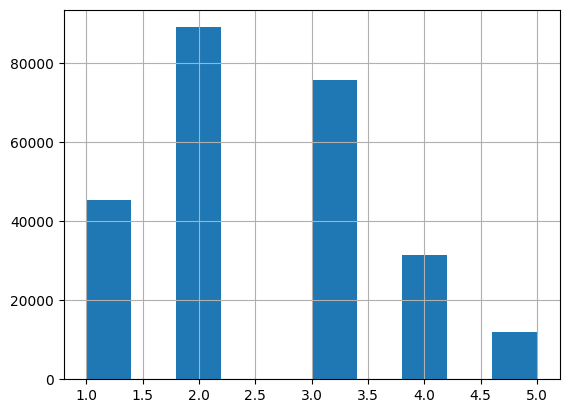

In [16]:
#distribution
df['GenHlth'].hist()

Categorical data.  Not normally distrubed

<Axes: >

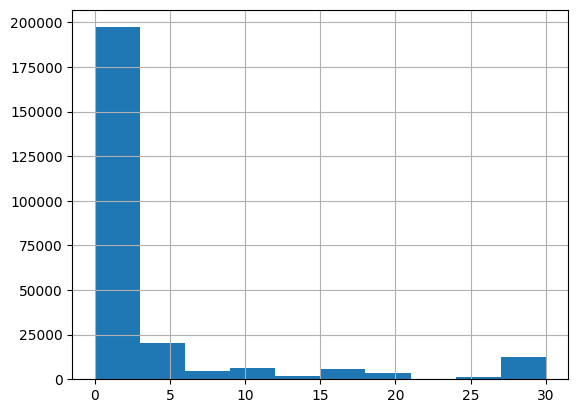

In [17]:
#distribution
df['MentHlth'].hist()

binary data. Data is not normally distributed

<Axes: >

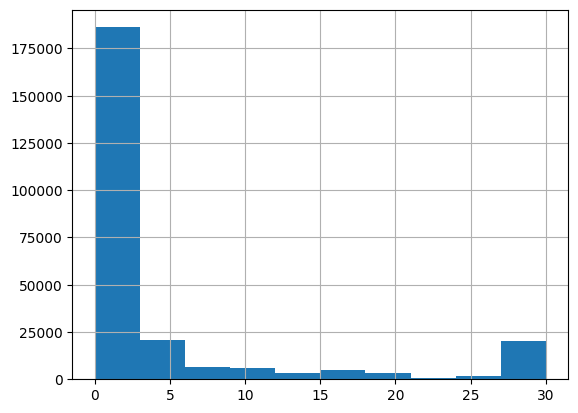

In [18]:
#distribution plot
df['PhysHlth'].hist()

## Check for outliers

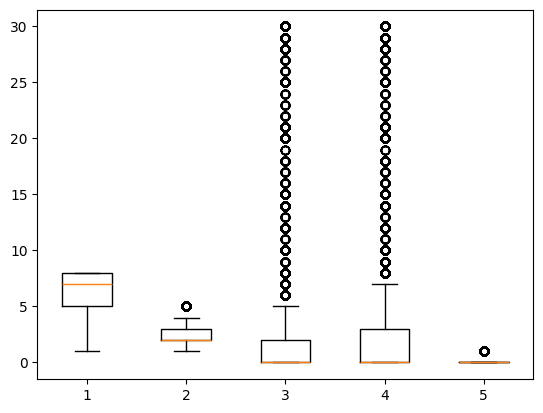

In [19]:
#box plot columns in the data to show large variances in data
plt.boxplot(df[['Income','GenHlth','MentHlth','PhysHlth','DiffWalk']]);

### summary statistics

In [20]:
df[['Diabetes_binary', 'Education','Age','GenHlth','MentHlth','PhysHlth','DiffWalk']].describe()

Diabetes_binary      Education            Age        GenHlth  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       5.050434       8.032119       2.511392   
std           0.346294       0.985774       3.054220       1.068477   
min           0.000000       1.000000       1.000000       1.000000   
25%           0.000000       4.000000       6.000000       2.000000   
50%           0.000000       5.000000       8.000000       2.000000   
75%           0.000000       6.000000      10.000000       3.000000   
max           1.000000       6.000000      13.000000       5.000000   

            MentHlth       PhysHlth       DiffWalk  
count  253680.000000  253680.000000  253680.000000  
mean        3.184772       4.242081       0.168224  
std         7.412847       8.717951       0.374066  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         2.000000       3.000000       0.000000  
max        30.000000      30.000000       1.000000

### What is wrong with this data?

box plot shows large variances and outliers in Mental Health and Physical Health Data. This diffently presents a skewed distribution.  Since, I do plan to use logistic regression since they data consist of 0,1.  According to the stats, there is a 30point difference from min and max for Mental and Physical Health data.  I will address this issue in Feature Engineering Part II

# Export data from URL and save to local drive

In [21]:
#create a dictionary. Save all my dataframes to my dictionary
data_dic = {}
  

In [22]:
#all data
data_dic['all_data'] = df 